In [ ]:
!pip install imbalanced-learn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving extracted_features_undersampling.csv to extracted_features_undersampling.csv
Saving extracted_features_oversampling.csv to extracted_features_oversampling.csv
Saving undersampling.csv to undersampling.csv
Saving oversampling.csv to oversampling.csv
Saving final_dataset.csv to final_dataset.csv


## Combining Original with Phishtank Dataset

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

# Load datasets
verified_online = pd.read_csv('/content/verified_online.csv')
url_dataset = pd.read_csv('/content/URL dataset.csv')

# Set all entries in verified_online as phishing
verified_online_all_phishing = verified_online[['url']].copy()
verified_online_all_phishing['type'] = 'phishing'

# Concatenate with the original URL dataset
combined_dataset_all_phishing = pd.concat([url_dataset, verified_online_all_phishing], ignore_index=True)

# Save the combined dataset
combined_dataset_all_phishing.to_csv('new_dataset.csv', index=False)


## New Dataset info

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = r'/content/dataset_phishing.csv'
dataset = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Shape:", dataset.shape)
print("Columns:", dataset.columns)
print(dataset.head())


Dataset Shape: (11430, 2)
Columns: Index(['url', 'status'], dtype='object')
                                                 url      status
0              http://www.crestonwood.com/router.php  legitimate
1  http://shadetreetechnology.com/V4/validation/a...    phishing
2  https://support-appleld.com.secureupdate.duila...    phishing
3                                 http://rgipt.ac.in  legitimate
4  http://www.iracing.com/tracks/gateway-motorspo...  legitimate


In [ ]:
# Display dataset information
print(dataset.info())

# Check for missing values
print(dataset.isnull().sum())

# Display basic statistics for numerical columns
print(dataset.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     11430 non-null  object
 1   status  11430 non-null  object
dtypes: object(2)
memory usage: 178.7+ KB
None
url       0
status    0
dtype: int64
                                                      url      status
count                                               11430       11430
unique                                              11429           2
top     http://e710z0ear.du.r.appspot.com/c:/users/use...  legitimate
freq                                                    2        5715


## Check for Valid URL

In [ ]:
from urllib.parse import urlparse

# Function to validate URLs
def is_valid_url(url):
    try:
        parsed = urlparse(url)
        return all([parsed.scheme, parsed.netloc])  # Valid if scheme and netloc exist
    except:
        return False

# Filter valid URLs
valid_urls_dataset = dataset[dataset['url'].apply(is_valid_url)]

print(f"Number of valid URLs: {len(valid_urls_dataset)}")

valid_urls_dataset.to_csv('valid_urls_dataset.csv', index=False)
print("Valid URLs dataset saved as 'valid_urls_dataset.csv'.")


Number of valid URLs: 11430
Valid URLs dataset saved as 'valid_urls_dataset.csv'.


## Check for duplications

In [ ]:
dataset = pd.read_csv('valid_urls_dataset.csv')

# Check for duplicates
duplicates = dataset[dataset.duplicated(subset='url', keep=False)]

print(f"Number of duplicate URLs: {len(duplicates)}")

#remove duplicates and keep the first occurrence:
unique_dataset = dataset.drop_duplicates(subset='url', keep='first')

# Save the unique dataset
unique_dataset.to_csv('final_dataset.csv', index=False)
print("Unique URLs dataset saved as 'final_dataset.csv'.")

Number of duplicate URLs: 2
Unique URLs dataset saved as 'final_dataset.csv'.


## Undersampling the data

In [ ]:
from sklearn.utils import resample

# Load the filtered dataset
file_path = '/content/final_dataset.csv'  # Use the saved valid URLs dataset
valid_urls_dataset = pd.read_csv(file_path)

# Validate that the dataset contains the required columns
if 'type' not in valid_urls_dataset.columns:
    raise ValueError("Dataset must contain a 'type' column indicating the class labels.")

# Separate majority and minority classes
majority_class = valid_urls_dataset[valid_urls_dataset['type'] == 'legitimate']  # Legitimate URLs
minority_class = valid_urls_dataset[valid_urls_dataset['type'] == 'phishing']  # Phishing URLs

# Undersample the majority class
majority_undersampled = resample(majority_class,
                                  replace=False,  # Sample without replacement
                                  n_samples=len(minority_class),  # Match minority class size
                                  random_state=42)  # Seed for reproducibility

# Combine the undersampled majority class with the minority class
balanced_dataset = pd.concat([majority_undersampled, minority_class])

# Shuffle the dataset
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print("New class distribution:")
print(balanced_dataset['type'].value_counts())

# Save the balanced dataset if needed
balanced_dataset.to_csv('undersampling.csv', index=False)
print("Balanced dataset saved as 'undersampling.csv'.")


New class distribution:
type
legitimate    171078
phishing      171078
Name: count, dtype: int64
Balanced dataset saved as 'undersampling.csv'.


## Oversampling the data

In [ ]:
from sklearn.utils import resample
import pandas as pd

# Load the filtered dataset
file_path = '/content/final_dataset.csv'  # Use the saved valid URLs dataset
valid_urls_dataset = pd.read_csv(file_path)

# Validate that the dataset contains the required columns
if 'type' not in valid_urls_dataset.columns:
    raise ValueError("Dataset must contain a 'type' column indicating the class labels.")

# Separate majority and minority classes
majority_class = valid_urls_dataset[valid_urls_dataset['type'] == 'legitimate']  # Legitimate URLs
minority_class = valid_urls_dataset[valid_urls_dataset['type'] == 'phishing']  # Phishing URLs

# Oversample the minority class
minority_oversampled = resample(minority_class,
                                replace=True,  # Sample with replacement
                                n_samples=len(majority_class),  # Match majority class size
                                random_state=42)  # Seed for reproducibility

# Combine the oversampled minority class with the majority class
balanced_dataset = pd.concat([majority_class, minority_oversampled])

# Shuffle the dataset
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print("New class distribution:")
print(balanced_dataset['type'].value_counts())

# Save the balanced dataset if needed
balanced_dataset.to_csv('oversampling.csv', index=False)
print("Balanced dataset saved as 'oversampling.csv'.")


New class distribution:
type
phishing      345738
legitimate    345738
Name: count, dtype: int64
Balanced dataset saved as 'oversampling.csv'.


## Compare the original and the undersampling

In [ ]:
import matplotlib.pyplot as plt

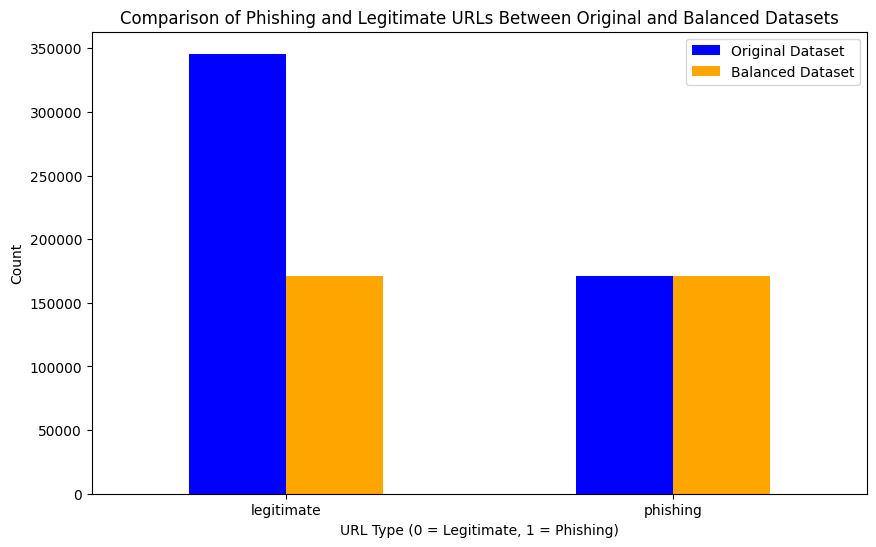

In [ ]:
# Load datasets
original_dataset_path = "/content/new_dataset.csv"
balanced_dataset_path = "/content/undersampling.csv"

# Load the datasets
original_df = pd.read_csv(original_dataset_path)
balanced_df = pd.read_csv(balanced_dataset_path)

# Count phishing and legitimate URLs in both datasets
original_counts = original_df['type'].value_counts()
balanced_counts = balanced_df['type'].value_counts()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Original Dataset": original_counts,
    "Balanced Dataset": balanced_counts
}).fillna(0)  # Fill missing values with 0 in case a type is missing in a dataset

# Plot the comparison
comparison_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Comparison of Phishing and Legitimate URLs Between Original and Balanced Datasets')
plt.xlabel('URL Type (0 = Legitimate, 1 = Phishing)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(["Original Dataset", "Balanced Dataset"])
plt.show()


## Compare the original and the oversampling

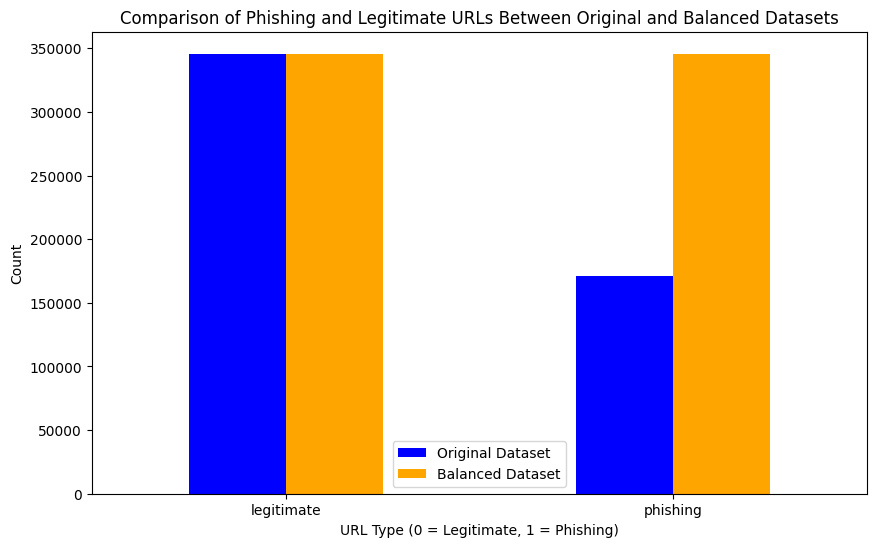

In [ ]:
# Load datasets
original_dataset_path = "/content/new_dataset.csv"
balanced_dataset_path = "/content/oversampling.csv"

# Load the datasets
original_df = pd.read_csv(original_dataset_path)
balanced_df = pd.read_csv(balanced_dataset_path)

# Count phishing and legitimate URLs in both datasets
original_counts = original_df['type'].value_counts()
balanced_counts = balanced_df['type'].value_counts()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Original Dataset": original_counts,
    "Balanced Dataset": balanced_counts
}).fillna(0)  # Fill missing values with 0 in case a type is missing in a dataset

# Plot the comparison
comparison_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Comparison of Phishing and Legitimate URLs Between Original and Balanced Datasets')
plt.xlabel('URL Type (0 = Legitimate, 1 = Phishing)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(["Original Dataset", "Balanced Dataset"])
plt.show()


## Extract all of the info

In [ ]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np


In [ ]:

# Load dataset
dataset_path = '/content/oversampling.csv'
dataset = pd.read_csv(dataset_path)

# Feature extraction function
def extract_features(url):
    try:
        parsed_url = urlparse(url)

        # Feature 1: URL length
        url_length = len(url)

        # Feature 2: Special characters count
        special_char_count = sum(1 for char in url if char in ['@', '#', '?', '/', '=', '&'])

        # Feature 3: HTTPS presence
        is_https = 1 if url.startswith('https://') else 0

        # Feature 4: Subdomain count
        subdomain_count = len(parsed_url.netloc.split('.')) - 2 if parsed_url.netloc else 0

        # Feature 5: Keywords in URL
        suspicious_keywords = ['login', 'secure', 'verify', 'bank', 'update']
        keyword_presence = 1 if any(keyword in url.lower() for keyword in suspicious_keywords) else 0

        # Feature 6: Entropy
        entropy = -sum(
            (url.count(char) / len(url)) * np.log2(url.count(char) / len(url))
            for char in set(url)
        ) if url else 0

        return [url_length, special_char_count, is_https, subdomain_count, keyword_presence, entropy]
    except Exception as e:
        # Return default values in case of an error
        return [0, 0, 0, 0, 0, 0]

# Apply feature extraction
dataset[['url_length', 'special_char_count', 'is_https', 'subdomain_count', 'keyword_presence', 'url_entropy']] = dataset['url'].apply(
    lambda x: pd.Series(extract_features(x))
)

print("Feature extraction completed!")

# Save the updated dataset to a new CSV file
output_path = '/content/extracted_features_dataset.csv'
dataset.to_csv(output_path, index=False)

print(f"Updated dataset with extracted features saved to: {output_path}")



KeyboardInterrupt: 

## Analysis after cleaning, undersampling and extraction


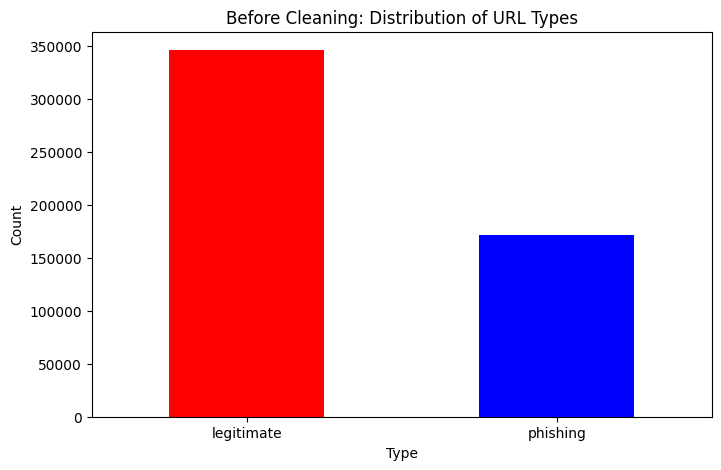

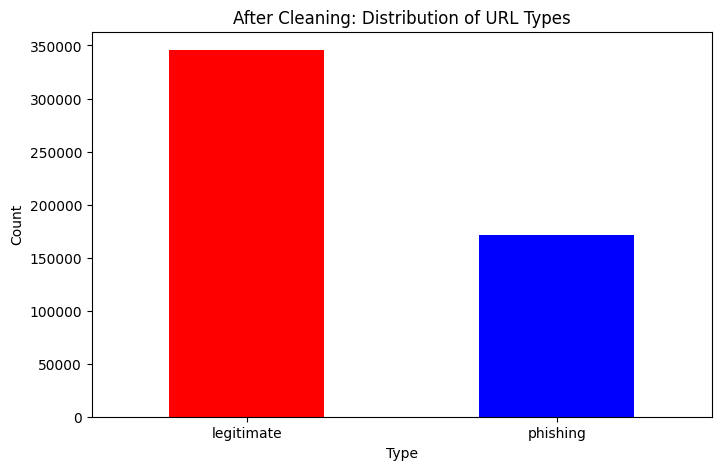

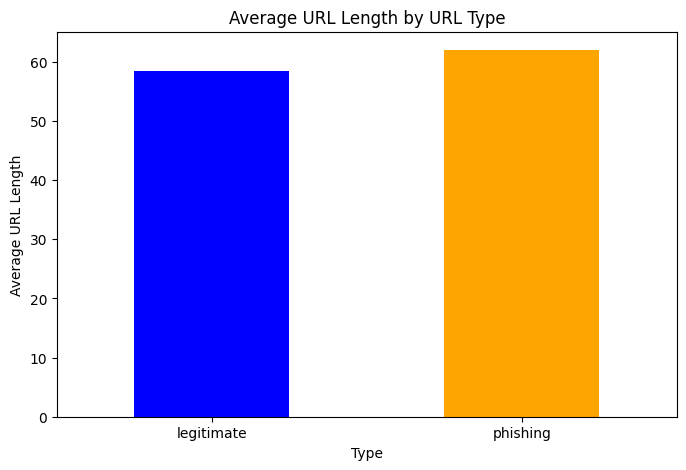

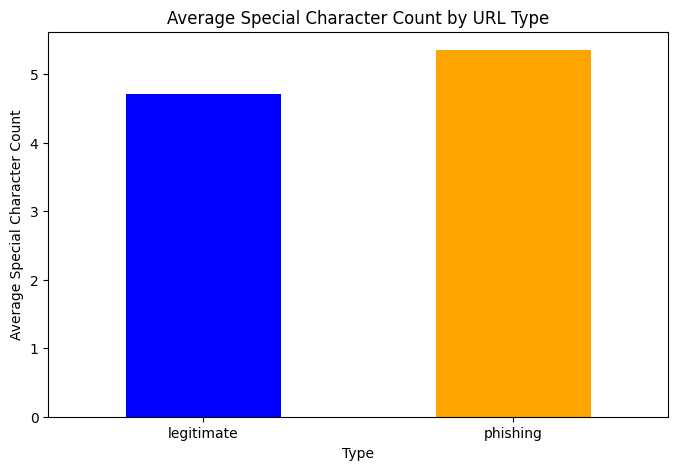

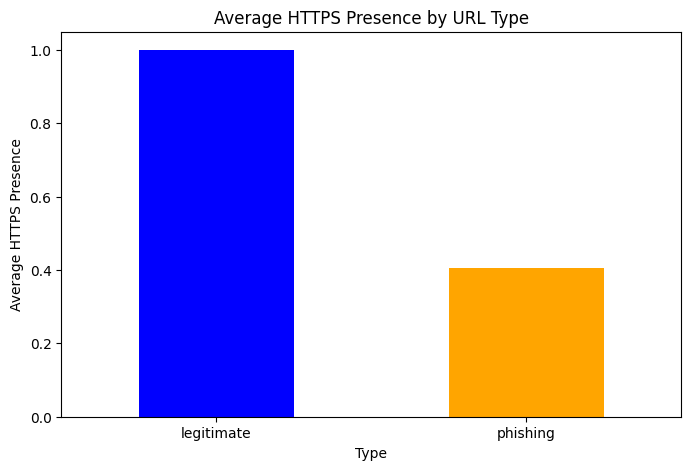

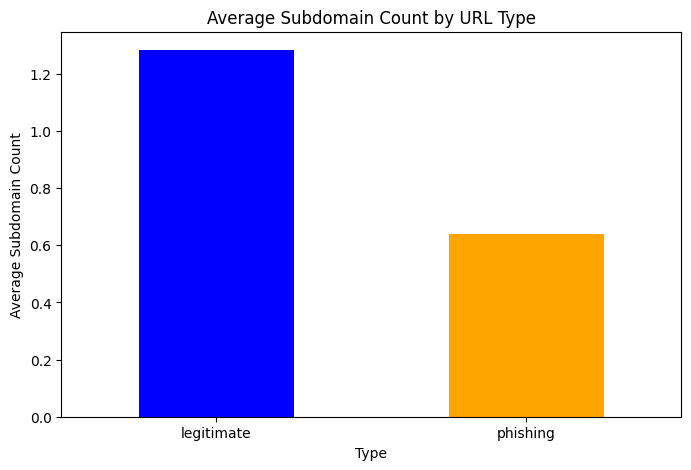

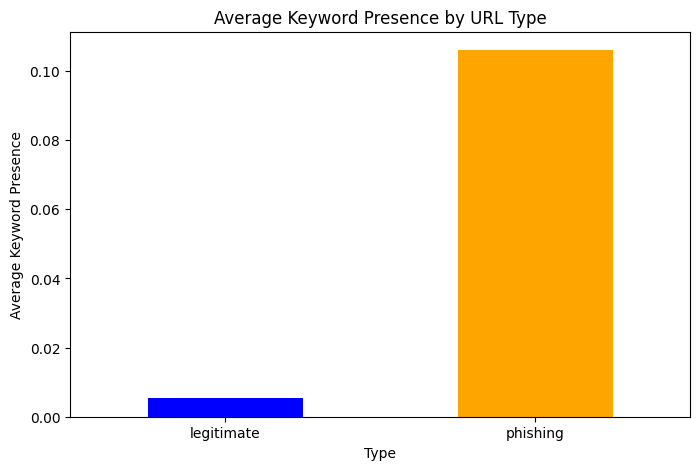

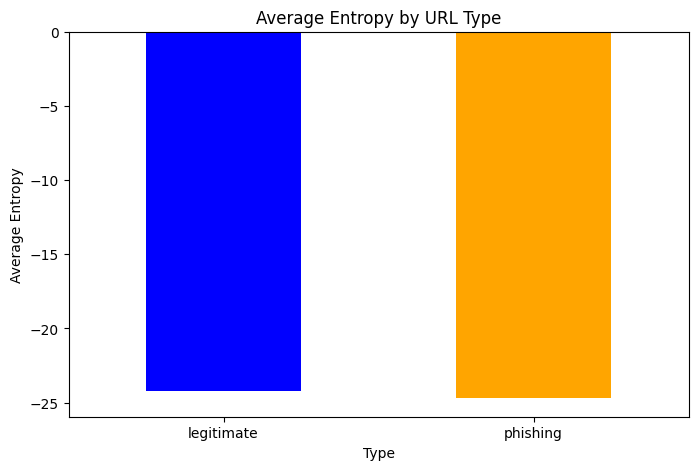

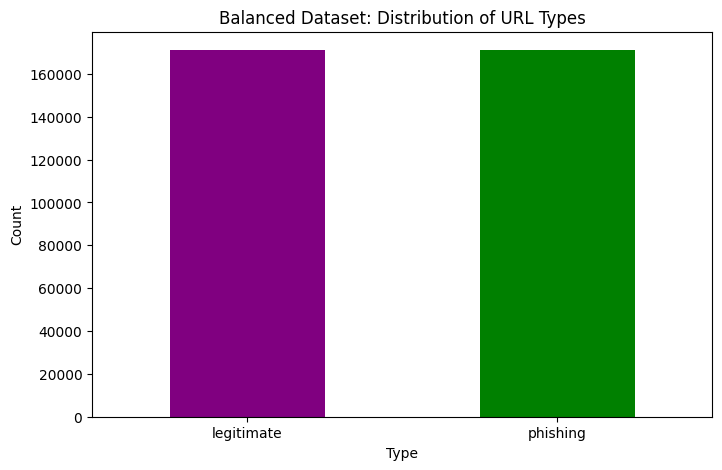

In [ ]:
from urllib.parse import urlparse

# Feature extraction function
def extract_features(url):
    parsed_url = urlparse(url)
    url_length = len(url)
    special_char_count = sum(1 for char in url if char in ['@', '#', '?', '/', '=', '&'])
    is_https = 1 if url.startswith('https://') else 0
    subdomain_count = len(parsed_url.netloc.split('.')) - 2 if parsed_url.netloc else 0
    suspicious_keywords = ['login', 'secure', 'verify', 'bank', 'update']
    keyword_presence = 1 if any(keyword in url.lower() for keyword in suspicious_keywords) else 0
    entropy = -sum((url.count(char) / len(url)) * (len(url) / url.count(char)) for char in set(url)) if url else 0
    return {
        "URL Length": url_length,
        "Special Character Count": special_char_count,
        "HTTPS Presence": is_https,
        "Subdomain Count": subdomain_count,
        "Keyword Presence": keyword_presence,
        "Entropy": entropy
    }

# Load datasets
original_dataset_path = "/content/final_dataset.csv"
balanced_dataset_path = "/content/undersampling.csv"

# Load the datasets
original_df = pd.read_csv(original_dataset_path)
balanced_df = pd.read_csv(balanced_dataset_path)

# Before Cleaning: Count of URL Types in Original Dataset
before_cleaning_counts = original_df["type"].value_counts()

# Cleaning and Preprocessing: Validate URLs and extract features
original_df["valid"] = original_df["url"].apply(lambda x: True if urlparse(x).scheme in ['http', 'https'] else False)
cleaned_df = original_df[original_df["valid"]]

# After Cleaning: Count of URL Types
after_cleaning_counts = cleaned_df["type"].value_counts()

# Extract features for cleaned dataset
features = cleaned_df["url"].apply(extract_features).apply(pd.Series)
df_features = pd.concat([cleaned_df.reset_index(drop=True), features], axis=1)

# 1. Graph: Difference in phishing and legitimate URLs before cleaning
plt.figure(figsize=(8, 5))
before_cleaning_counts.plot(kind='bar', color=['red', 'blue'])
plt.title("Before Cleaning: Distribution of URL Types")
plt.ylabel("Count")
plt.xlabel("Type")
plt.xticks(rotation=0)
plt.show()

# 2. Graph: Difference in phishing and legitimate URLs after cleaning
plt.figure(figsize=(8, 5))
after_cleaning_counts.plot(kind='bar', color=['red', 'blue'])
plt.title("After Cleaning: Distribution of URL Types")
plt.ylabel("Count")
plt.xlabel("Type")
plt.xticks(rotation=0)
plt.show()

# 3. Graph: Features extracted from URLs
feature_cols = [
    "URL Length",
    "Special Character Count",
    "HTTPS Presence",
    "Subdomain Count",
    "Keyword Presence",
    "Entropy"
]

# Plot each feature
for feature in feature_cols:
    plt.figure(figsize=(8, 5))
    df_features.groupby("type")[feature].mean().plot(kind='bar', color=['blue', 'orange'])
    plt.title(f"Average {feature} by URL Type")
    plt.ylabel(f"Average {feature}")
    plt.xlabel("Type")
    plt.xticks(rotation=0)
    plt.show()

# BONUS: Balanced Dataset Analysis
# Analyze the balanced dataset
balanced_counts = balanced_df["type"].value_counts()

plt.figure(figsize=(8, 5))
balanced_counts.plot(kind='bar', color=['purple', 'green'])
plt.title("Balanced Dataset: Distribution of URL Types")
plt.ylabel("Count")
plt.xlabel("Type")
plt.xticks(rotation=0)
plt.show()


## Analysis after cleaning, oversampling and extraction


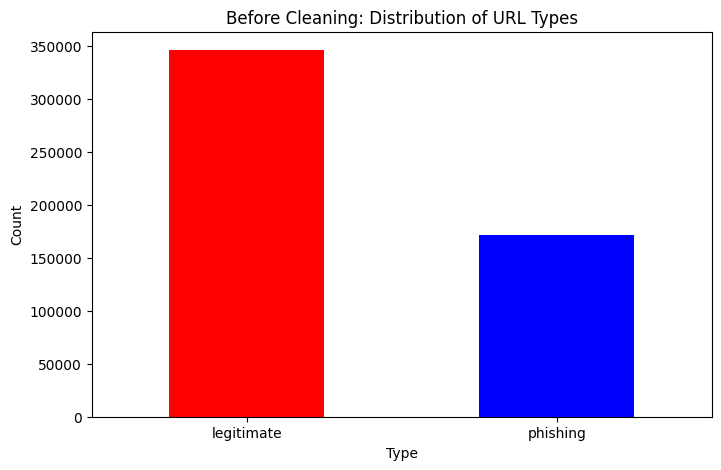

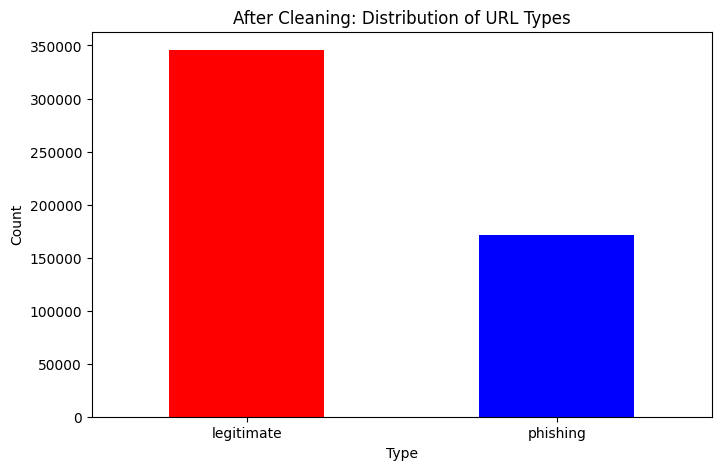

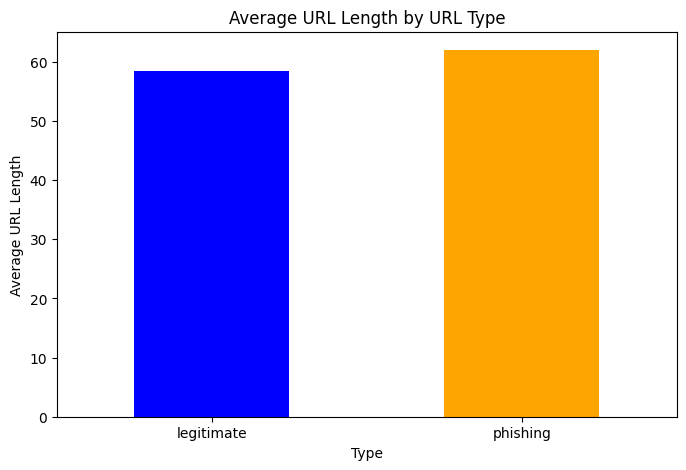

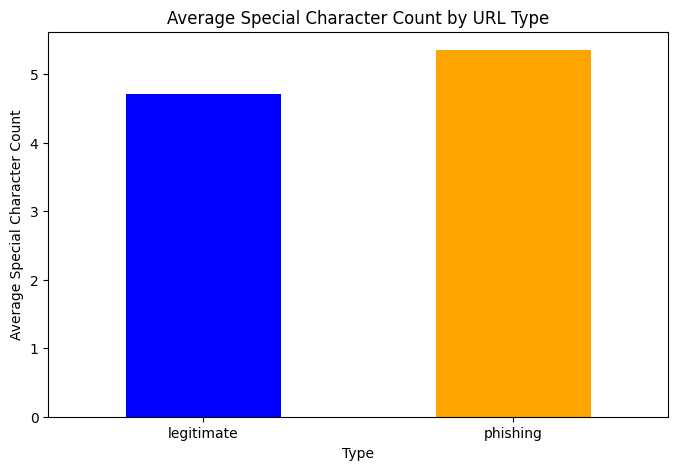

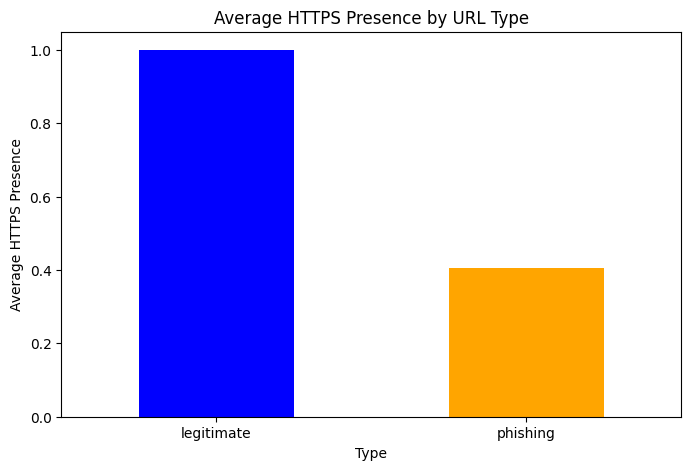

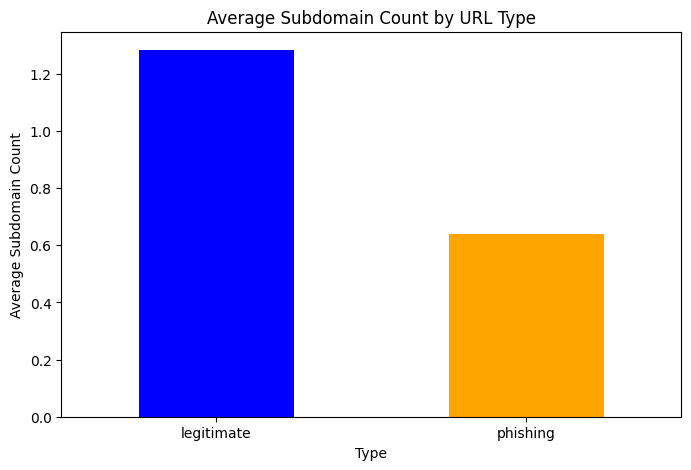

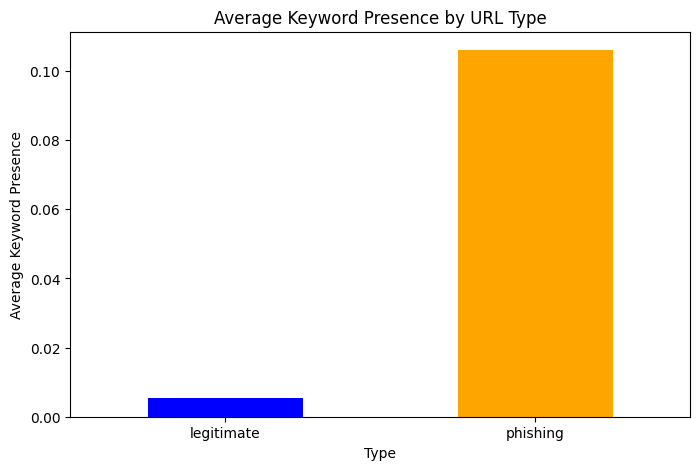

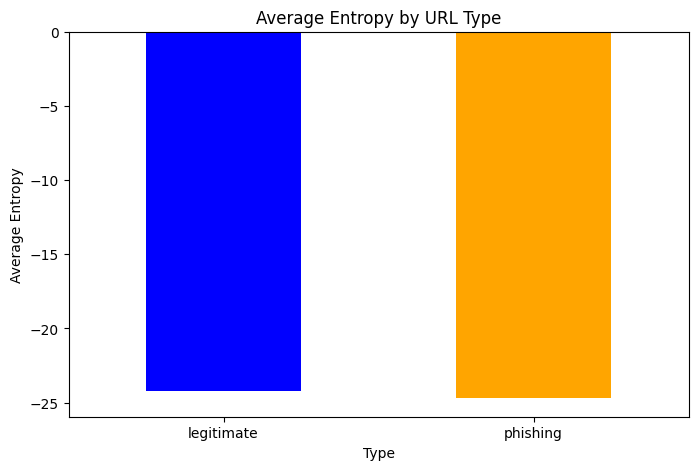

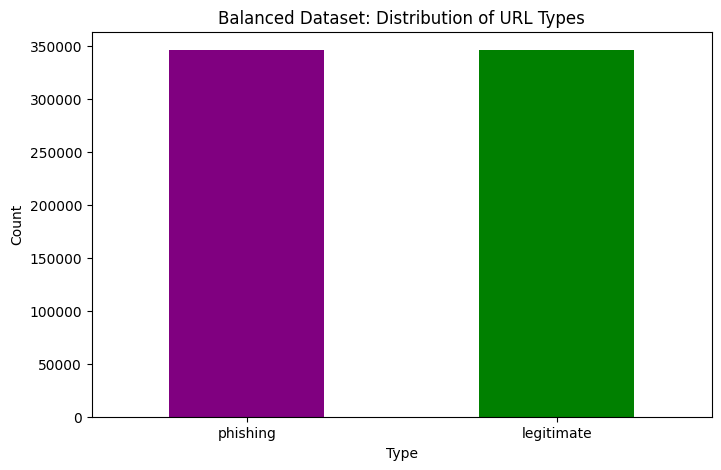

In [ ]:
from urllib.parse import urlparse

# Feature extraction function
def extract_features(url):
    parsed_url = urlparse(url)
    url_length = len(url)
    special_char_count = sum(1 for char in url if char in ['@', '#', '?', '/', '=', '&'])
    is_https = 1 if url.startswith('https://') else 0
    subdomain_count = len(parsed_url.netloc.split('.')) - 2 if parsed_url.netloc else 0
    suspicious_keywords = ['login', 'secure', 'verify', 'bank', 'update']
    keyword_presence = 1 if any(keyword in url.lower() for keyword in suspicious_keywords) else 0
    entropy = -sum((url.count(char) / len(url)) * (len(url) / url.count(char)) for char in set(url)) if url else 0
    return {
        "URL Length": url_length,
        "Special Character Count": special_char_count,
        "HTTPS Presence": is_https,
        "Subdomain Count": subdomain_count,
        "Keyword Presence": keyword_presence,
        "Entropy": entropy
    }

# Load datasets
original_dataset_path = "/content/final_dataset.csv"
balanced_dataset_path = "/content/oversampling.csv"

# Load the datasets
original_df = pd.read_csv(original_dataset_path)
balanced_df = pd.read_csv(balanced_dataset_path)

# Before Cleaning: Count of URL Types in Original Dataset
before_cleaning_counts = original_df["type"].value_counts()

# Cleaning and Preprocessing: Validate URLs and extract features
original_df["valid"] = original_df["url"].apply(lambda x: True if urlparse(x).scheme in ['http', 'https'] else False)
cleaned_df = original_df[original_df["valid"]]

# After Cleaning: Count of URL Types
after_cleaning_counts = cleaned_df["type"].value_counts()

# Extract features for cleaned dataset
features = cleaned_df["url"].apply(extract_features).apply(pd.Series)
df_features = pd.concat([cleaned_df.reset_index(drop=True), features], axis=1)

# 1. Graph: Difference in phishing and legitimate URLs before cleaning
plt.figure(figsize=(8, 5))
before_cleaning_counts.plot(kind='bar', color=['red', 'blue'])
plt.title("Before Cleaning: Distribution of URL Types")
plt.ylabel("Count")
plt.xlabel("Type")
plt.xticks(rotation=0)
plt.show()

# 2. Graph: Difference in phishing and legitimate URLs after cleaning
plt.figure(figsize=(8, 5))
after_cleaning_counts.plot(kind='bar', color=['red', 'blue'])
plt.title("After Cleaning: Distribution of URL Types")
plt.ylabel("Count")
plt.xlabel("Type")
plt.xticks(rotation=0)
plt.show()

# 3. Graph: Features extracted from URLs
feature_cols = [
    "URL Length",
    "Special Character Count",
    "HTTPS Presence",
    "Subdomain Count",
    "Keyword Presence",
    "Entropy"
]

# Plot each feature
for feature in feature_cols:
    plt.figure(figsize=(8, 5))
    df_features.groupby("type")[feature].mean().plot(kind='bar', color=['blue', 'orange'])
    plt.title(f"Average {feature} by URL Type")
    plt.ylabel(f"Average {feature}")
    plt.xlabel("Type")
    plt.xticks(rotation=0)
    plt.show()

# BONUS: Balanced Dataset Analysis
# Analyze the balanced dataset
balanced_counts = balanced_df["type"].value_counts()

plt.figure(figsize=(8, 5))
balanced_counts.plot(kind='bar', color=['purple', 'green'])
plt.title("Balanced Dataset: Distribution of URL Types")
plt.ylabel("Count")
plt.xlabel("Type")
plt.xticks(rotation=0)
plt.show()



## Training Model

In [ ]:
dataset = pd.read_csv('extracted_features_undersampling.csv')

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = dataset[['url_length', 'special_char_count', 'is_https', 'subdomain_count', 'keyword_presence', 'url_entropy']]
y = dataset['type'].apply(lambda x: 1 if x == 'phishing' else 0)  # Convert target to binary

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
!pip install xgboost scikit-learn

In [ ]:
!pip install --upgrade xgboost
!pip install --upgrade scikit-learn


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
import numpy as np


In [ ]:
model = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,  # Ensures no label encoding issues
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

print("Model training completed!")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:28:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model training completed!


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     34137
           1       0.97      0.87      0.91     34295

    accuracy                           0.92     68432
   macro avg       0.92      0.92      0.92     68432
weighted avg       0.92      0.92      0.92     68432

Accuracy: 0.9179915828851999
AUC-ROC Score: 0.9726037549878721


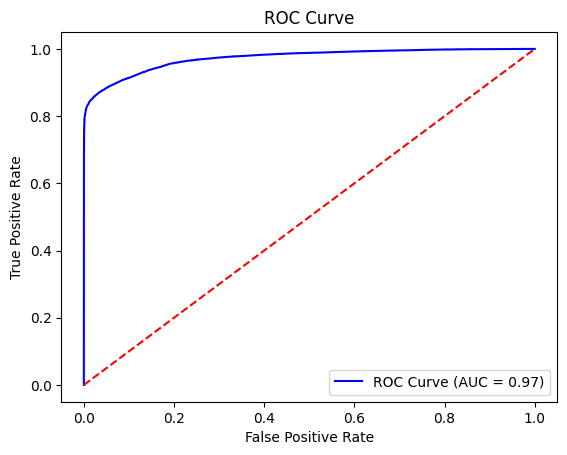

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probabilities for the positive class
y_proba = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'phishing_detection_model.pkl')
print("Model saved as 'phishing_detection_model_oversampling.pkl'.")


Model saved as 'phishing_detection_model_oversampling.pkl'.


## Model Testing


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving model4.pkl to model4.pkl


# Testing 1

In [ ]:
import joblib
import pandas as pd
import numpy as np
from urllib.parse import urlparse

# Feature extraction function (matching training features)
def main(url):
    parsed_url = urlparse(url)

    # Extract features matching the trained model
    url_length = len(url)
    special_char_count = sum(1 for char in url if char in ['@', '#', '?', '/', '=', '&'])
    is_https = 1 if url.startswith('https://') else 0
    subdomain_count = len(parsed_url.netloc.split('.')) - 2 if parsed_url.netloc else 0
    suspicious_keywords = ['login', 'secure', 'verify', 'bank', 'update']
    keyword_presence = 1 if any(keyword in url.lower() for keyword in suspicious_keywords) else 0
    entropy = -sum((url.count(char) / len(url)) * (len(url) / url.count(char)) for char in set(url)) if url else 0

    # Return features as a list
    return [url_length, special_char_count, is_https, subdomain_count, keyword_presence, entropy]

# Prediction function
def get_prediction_from_url(test_url, model):
    features_test = main(test_url)  # Use the feature extraction function
    features_test = np.array(features_test).reshape((1, -1))
    pred = model.predict(features_test)
    return "SAFE" if int(pred[0]) == 0 else "PHISHING"

# Load the test dataset
test_file_path = r'/content/PhiUSIIL_Phishing_URL_Dataset.csv'
test_dataset = pd.read_csv(test_file_path)

# Assume the URLs are in the first column
test_urls = test_dataset.iloc[:, 1].tolist()

# Counters for total predictions and phishing predictions
total_urls = 0
phishing_count = 0

model = joblib.load(r'/content/phishing_detection_model_undersampling.pkl')
# Iterate over test URLs and predict
for url in test_urls:
    prediction = get_prediction_from_url(url, model)
    print(f"URL: {url} -> Prediction: {prediction}")
    total_urls += 1
    if prediction == "PHISHING":
        phishing_count += 1

# Calculate percentage of phishing URLs
percentage_phishing = (phishing_count / total_urls) * 100
print(f"Percentage of PHISHING URLs: {percentage_phishing:.2f}%")


Streaming output truncated to the last 5000 lines.
URL: https://www.rudybruneraward.org -> Prediction: PHISHING
URL: https://www.moldefk.no -> Prediction: SAFE
URL: https://www.bft.org -> Prediction: SAFE
URL: http://dev-bancadegeneral.pantheonsite.io -> Prediction: PHISHING
URL: https://www.stormxgames.com -> Prediction: PHISHING
URL: https://www.jacobspaulsen.com -> Prediction: PHISHING
URL: https://nicos-baumdienst.de/s/anti/torsion/ -> Prediction: PHISHING
URL: http://www.zclassic.beeppool.org -> Prediction: PHISHING
URL: http://www.omwowxiss.ga -> Prediction: PHISHING
URL: https://www.meetnky.com -> Prediction: SAFE
URL: https://www.theutahreview.com -> Prediction: PHISHING
URL: https://www.introducingbucharest.com -> Prediction: PHISHING
URL: https://www.pardiso-project.org -> Prediction: PHISHING
URL: http://www.radiodetali-skupka.ru -> Prediction: PHISHING
URL: https://www.travelagewest.com -> Prediction: PHISHING
URL: https://www.expo21xx.com -> Prediction: SAFE
URL: https://w

In [ ]:
#URL from PhishTank
urls = ['https://slipmon.web.app/','https://soutra-4b902.web.app/','	https://zimhggfjf.web.app/', '	https://photopohod.ru/olus/files','	https://replyua-info-teamcheck.web.app/']

# Predict the class for each URL and print the results
for url in urls:
    print(get_prediction_from_url(url, model))

SAFE
SAFE
PHISHING
PHISHING
PHISHING


# Testing 2

In [ ]:
import pandas as pd
import joblib
from urllib.parse import urlparse
import numpy as np
# Feature extraction function (matching training features)
def main(url):
    parsed_url = urlparse(url)

    # Extract features matching the trained model
    url_length = len(url)
    special_char_count = sum(1 for char in url if char in ['@', '#', '?', '/', '=', '&'])
    is_https = 1 if url.startswith('https://') else 0
    subdomain_count = len(parsed_url.netloc.split('.')) - 2 if parsed_url.netloc else 0
    suspicious_keywords = ['login', 'secure', 'verify', 'bank', 'update']
    keyword_presence = 1 if any(keyword in url.lower() for keyword in suspicious_keywords) else 0
    entropy = -sum((url.count(char) / len(url)) * (len(url) / url.count(char)) for char in set(url)) if url else 0

    # Return features as a list
    return [url_length, special_char_count, is_https, subdomain_count, keyword_presence, entropy]

# Prediction function
def get_prediction_from_url(test_url, model):
    features_test = main(test_url)  # Use the feature extraction function
    features_test = np.array(features_test).reshape((1, -1))
    pred = model.predict(features_test)
    return "SAFE" if int(pred[0]) == 0 else "PHISHING"

# Load the test dataset
test_file_path = r'/content/verified_online.csv'
test_dataset = pd.read_csv(test_file_path)

# Assume the URLs are in the first column
test_urls = test_dataset.iloc[:, 1].tolist()

# Counters for total predictions and phishing predictions
total_urls = 0
phishing_count = 0

model = joblib.load(r'/content/model4.pkl')
# Iterate over test URLs and predict
for url in test_urls:
    prediction = get_prediction_from_url(url, model)
    print(f"URL: {url} -> Prediction: {prediction}")
    total_urls += 1
    if prediction == "PHISHING":
        phishing_count += 1

# Calculate percentage of phishing URLs
percentage_phishing = (phishing_count / total_urls) * 100
print(f"Percentage of PHISHING URLs: {percentage_phishing:.2f}%")


FileNotFoundError: [Errno 2] No such file or directory: '/content/verified_online.csv'

## Testing 3

In [ ]:
import pandas as pd
import joblib
from urllib.parse import urlparse
import numpy as np
# Feature extraction function (matching training features)
def main(url):
    parsed_url = urlparse(url)

    # Extract features matching the trained model
    url_length = len(url)
    special_char_count = sum(1 for char in url if char in ['@', '#', '?', '/', '=', '&'])
    is_https = 1 if url.startswith('https://') else 0
    subdomain_count = len(parsed_url.netloc.split('.')) - 2 if parsed_url.netloc else 0
    suspicious_keywords = ['login', 'secure', 'verify', 'bank', 'update']
    keyword_presence = 1 if any(keyword in url.lower() for keyword in suspicious_keywords) else 0
    entropy = -sum((url.count(char) / len(url)) * (len(url) / url.count(char)) for char in set(url)) if url else 0

    # Return features as a list
    return [url_length, special_char_count, is_https, subdomain_count, keyword_presence, entropy]

# Prediction function
def get_prediction_from_url(test_url, model):
    features_test = main(test_url)  # Use the feature extraction function
    features_test = np.array(features_test).reshape((1, -1))
    pred = model.predict(features_test)
    return "SAFE" if int(pred[0]) == 0 else "PHISHING"

# Load the test dataset
test_file_path = r'/content/PhiUSIIL_Phishing_URL_Dataset.csv'
test_dataset = pd.read_csv(test_file_path)

# Assume the URLs are in the first column
test_urls = test_dataset.iloc[:, 1].tolist()

# Counters for total predictions and phishing predictions
total_urls = 0
phishing_count = 0

model = joblib.load(r'/content/phishing_detection_model_oversampling.pkl')
# Iterate over test URLs and predict
for url in test_urls:
    prediction = get_prediction_from_url(url, model)
    print(f"URL: {url} -> Prediction: {prediction}")
    total_urls += 1
    if prediction == "PHISHING":
        phishing_count += 1

# Calculate percentage of phishing URLs
percentage_phishing = (phishing_count / total_urls) * 100
print(f"Percentage of PHISHING URLs: {percentage_phishing:.2f}%")

Streaming output truncated to the last 5000 lines.
URL: https://www.rudybruneraward.org -> Prediction: SAFE
URL: https://www.moldefk.no -> Prediction: SAFE
URL: https://www.bft.org -> Prediction: SAFE
URL: http://dev-bancadegeneral.pantheonsite.io -> Prediction: PHISHING
URL: https://www.stormxgames.com -> Prediction: SAFE
URL: https://www.jacobspaulsen.com -> Prediction: PHISHING
URL: https://nicos-baumdienst.de/s/anti/torsion/ -> Prediction: PHISHING
URL: http://www.zclassic.beeppool.org -> Prediction: PHISHING
URL: http://www.omwowxiss.ga -> Prediction: PHISHING
URL: https://www.meetnky.com -> Prediction: SAFE
URL: https://www.theutahreview.com -> Prediction: PHISHING
URL: https://www.introducingbucharest.com -> Prediction: PHISHING
URL: https://www.pardiso-project.org -> Prediction: SAFE
URL: http://www.radiodetali-skupka.ru -> Prediction: PHISHING
URL: https://www.travelagewest.com -> Prediction: PHISHING
URL: https://www.expo21xx.com -> Prediction: SAFE
URL: https://www.vnoc.com 

Old Model testing with new dataset

## Other function

In [ ]:
!pip install tld

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 8.6 MB/s eta 0:00:00


In [ ]:
import re
import pandas as pd
import itertools
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from wordcloud import WordCloud

df = pd.read_csv(r'/content/URL dataset.csv')
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))
from urllib.parse import urlparse
def abnormal_url(url):
    hostname = urlparse(url).hostname
    if hostname is None or not hostname:
      return 0
    hostname = str(hostname)
    match = re.search(re.escape(hostname), url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

from googlesearch import search
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))
def count_dot(url):
    count_dot = url.count('.')
    return count_dot
df['count.'] = df['url'].apply(lambda i: count_dot(i))
def count_www(url):
    url.count('www')
    return url.count('www')
df['count-www'] = df['url'].apply(lambda i: count_www(i))
def count_atrate(url):

    return url.count('@')
df['count@'] = df['url'].apply(lambda i: count_atrate(i))
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

df['short_url'] = df['url'].apply(lambda i: shortening_service(i))
def count_https(url):
    return url.count('https')
df['count-https'] = df['url'].apply(lambda i : count_https(i))
def count_http(url):
    return url.count('http')
df['count-http'] = df['url'].apply(lambda i : count_http(i))
def count_per(url):
    return url.count('%')
df['count%'] = df['url'].apply(lambda i : count_per(i))
def count_ques(url):
    return url.count('?')
df['count?'] = df['url'].apply(lambda i: count_ques(i))
def count_hyphen(url):
    return url.count('-')
df['count-'] = df['url'].apply(lambda i: count_hyphen(i))
def count_equal(url):
    return url.count('=')
df['count='] = df['url'].apply(lambda i: count_equal(i))
def url_length(url):
    return len(str(url))
#Length of URL
df['url_length'] = df['url'].apply(lambda i: url_length(i))
#Hostname Length
def hostname_length(url):
    return len(urlparse(url).netloc)
df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))
df.head()
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))

from urllib.parse import urlparse
from tld import get_tld
import os.path
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
df['fd_length'] = df['url'].apply(lambda i: fd_length(i))
#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [ ]:
# Update the main function to extract the correct number of features
def main(url):
    status = []

    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))
    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))
    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(fd_length(url))
    tld = get_tld(url, fail_silently=True)
    status.append(tld_length(tld))
    status.append(digit_count(url))
    status.append(letter_count(url))

    return status
model2 = joblib.load(r'/content/xgb_model.pkl')
test_file_path2 = r'/content/dataset_phishing_testing.csv'
Phish2 = pd.read_csv(test_file_path2)
# Predict function
def get_prediction_from_url(test_url, model2):
    features_test = main(test_url)
    # Due to updates to scikit-learn, we now need a 2D array as a parameter to the predict function.
    features_test = np.array(features_test).reshape((1, -1))
    pred = model2.predict(features_test)
    if int(pred[0]) == 0:
        res = "SAFE"
    elif int(pred[0]) == 1:
        res = "PHISHING"
    return res


# Assuming the URLs are in the first column of Phish2
urls = Phish2.iloc[:, 0].tolist()

# Counters for total predictions and phishing predictions
total_urls = 0
phishing_count = 0

# Predict the class for each URL and print the results
for url in urls:
    prediction = get_prediction_from_url(url, model2)
    print(prediction)
    total_urls += 1
    if prediction == "PHISHING":
        phishing_count += 1

# Calculate percentage of phishing URLs
percentage_phishing = (phishing_count / total_urls) * 100

print(f"Percentage of PHISHING URLs: {percentage_phishing:.2f}%")

Streaming output truncated to the last 5000 lines.
SAFE
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
SAFE
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
SAFE
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
SAFE
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
SAFE
PHISHING
PHISHING
PHISHING
PHISHING
SAFE
PHISHING
PHISHING
SAFE
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
SAFE
PHISHING
PHISHING
PHISHING
SAFE
PHISHING
PHISHING
PHISHING
PHISHING
SAFE
PHISHING
PHISHING
PHISHING
SAFE
SAFE
PHISHING
SAFE
PHISHING
SAFE
PHISHING
SAFE
SAFE
PHISHING
PHISHING
PHISHING
SAFE
PHISHING
PHISHING
PHISHING
SAFE
PHISHING
PHISHING
SAFE
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
SAFE
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
SAFE
PHISHING
PHISHING
PHISHING
PHISHING
PHISHIN